**GRAFO CAMINHO HAMILTONIANO**

In [ ]:
pip install networkx

In [ ]:
pip install matplotlib

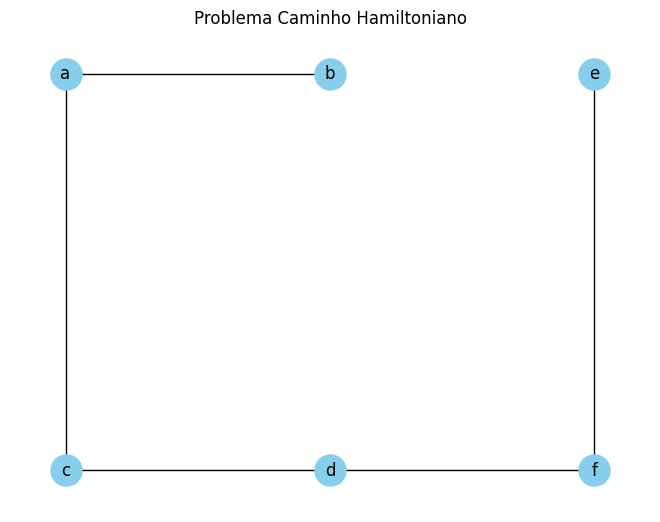

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_node("b")
G.add_node("a")
G.add_node("c")
G.add_node("d")
G.add_node("f")
G.add_node("e")

G.add_edge("b", "a")
G.add_edge("a", "c")
G.add_edge("c", "d")
G.add_edge("d", "f")
G.add_edge("f", "e")

pos = {
    "b": (0, 0),
    "a": (-1, 0),
    "c": (-1, -1),
    "d": (0, -1),
    "f": (1, -1),
    "e": (1, 0),
}

nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue")
plt.title("Problema Caminho Hamiltoniano")
plt.axis("off")
plt.show()

In [ ]:
import networkx as nx

G = nx.Graph()
G.add_node("b")
G.add_node("a")
G.add_node("c")
G.add_node("d")
G.add_node("f")
G.add_node("e")
G.add_edge("b", "a")
G.add_edge("a", "c")
G.add_edge("c", "d")
G.add_edge("d", "f")
G.add_edge("f", "e")

cliques = list(nx.find_cliques(G))
max_clique = max(cliques, key=len)

print("Clique:", max_clique)

Clique: ['f', 'd']


**GRAFO COM K = 4**

In [ ]:
def has_clique(graph, k, clique=[]):
    if k == 0:
        return True
    if not clique:
        for node in graph:
            if has_clique(graph, k - 1, clique + [node]):
                return True
    else:
        for node in clique[-1:]:
            neighbors = set(graph[node]) - set(clique)
            for neighbor in neighbors:
                if has_clique(graph, k - 1, clique + [neighbor]):
                    return True
    return False

graph = {
    'a': ['b'],
    'b': ['a', 'c'],
    'c': ['b', 'd', 'e'],
    'd': ['c'],
    'e': ['c'],
    'f': []
}

k = 4

if has_clique(graph, k):
    print("O grafo possui clique de tamanho >= k")
else:
    print("O grafo não possui clique de tamanho >= k")

O grafo possui clique de tamanho >= k


**GRAFO COM K = 2**

In [ ]:
def has_independent_set(graph, k, independent_set=[]):
    if k == 0:
        return True
    if not independent_set:
        for node in graph:
            if has_independent_set(graph, k - 1, independent_set + [node]):
                return True
    else:
        for node in graph:
            is_independent = all(node not in graph[adj_node] for adj_node in independent_set)
            if is_independent and has_independent_set(graph, k - 1, independent_set + [node]):
                return True
    return False

graph = {
    'a': ['b', 'c'],
    'b': ['a', 'c'],
    'c': ['a', 'b', 'd', 'e'],
    'd': ['c'],
    'e': ['c'],
    'f': []
}

k = 2

if has_independent_set(graph, k):
    print("O grafo possui um conjunto independente de vértices de tamanho >= k")
else:
    print("O grafo não possui um conjunto independente de vértices de tamanho >= k")


O grafo possui um conjunto independente de vértices de tamanho >= k


**COLORAÇÃO DE GRAFOS**

Número de cores: 2


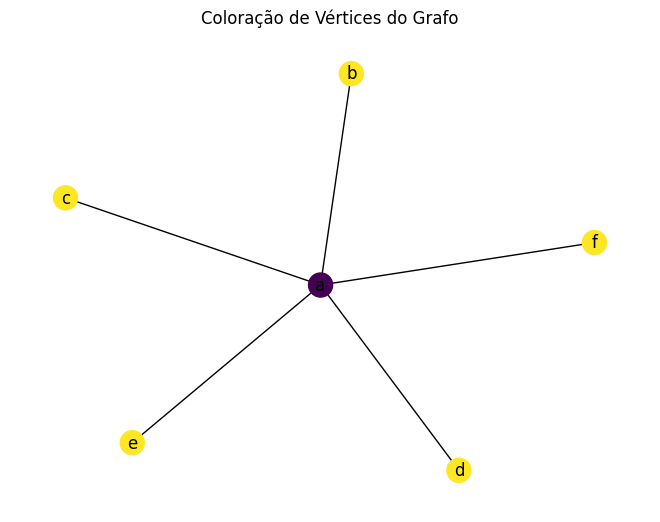

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(['a', 'b', 'c', 'd', 'e', 'f'])
G.add_edges_from([('a', 'b'), ('a', 'c'), ('a', 'd'), ('a', 'e'), ('a', 'f')])

coloring = nx.coloring.greedy_color(G, strategy="largest_first")

num_colors = max(coloring.values()) + 1

print("Número de cores:", num_colors)

pos = nx.spring_layout(G)
node_colors = [coloring[node] for node in G.nodes]
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.get_cmap("viridis"))
plt.title("Coloração de Vértices do Grafo")
plt.show()